# 01_board_detect

_Minimal code + short comments. Load config → read first video frame → warp board → split 8×8 → preview & save._

In [1]:
# imports
import os, glob, cv2, numpy as np
import matplotlib.pyplot as plt
from Chess_Detection_Competition.utils import load_config, ensure_dir

from Chess_Detection_Competition.improved_board import warp_board_v2, split_grid_v2  # ใหม่

# display helper
def imshow_rgb(img, title=None, size=(6,6)):
    plt.figure(figsize=size)
    if img.ndim==2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    if title: plt.title(title)
    plt.axis('off')
    plt.show()

In [2]:
# 1) load config + pick first video (safe version)
from Chess_Detection_Competition.utils import _project_root

cfg = load_config()
ROOT = _project_root()
video_dir = ROOT / cfg["paths"]["videos_dir"]

videos = sorted(video_dir.glob("*.mp4"))
assert videos, f"No videos found in {video_dir}"

video_path = videos[0]
print("Using video:", video_path.name)



Using video: 2_Move_rotate_student.mp4


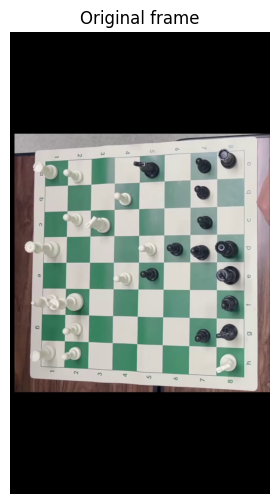

In [3]:
# === Cell 1: read first frame (ใช้ video_path จาก cell ของคุณ) ===
cap = cv2.VideoCapture(str(video_path))
ok, frame = cap.read()
cap.release()
assert ok and frame is not None, f"Cannot read first frame: {video_path}"

imshow_rgb(frame, "Original frame", size=(4,6))



[auto] Strategy 1: HSV Masking SUCCESS
Warped shape: (800, 800, 3)


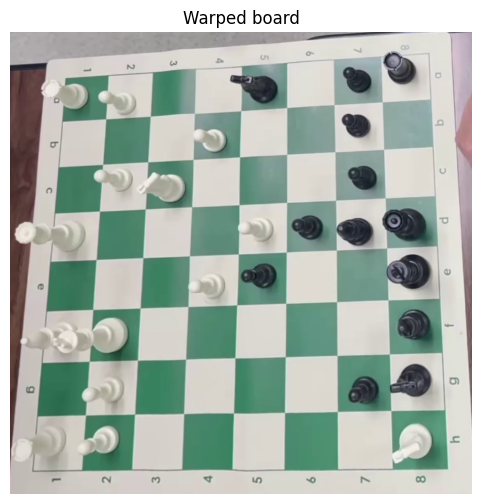

In [4]:
# Cell: warp board (AUTO MODE)
from Chess_Detection_Competition.improved_board import warp_board_v2

# Use AUTO detection - no manual clicking needed
warped, aux = warp_board_v2(frame, cfg, manual_mode=False)

assert warped is not None and warped.size > 0, "warp failed"

print(f"Warped shape: {warped.shape}")
imshow_rgb(warped, "Warped board", size=(6,6))

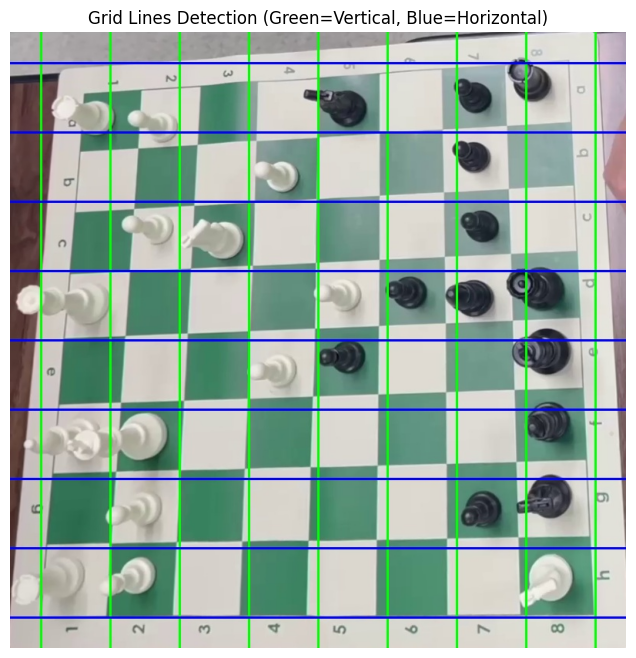

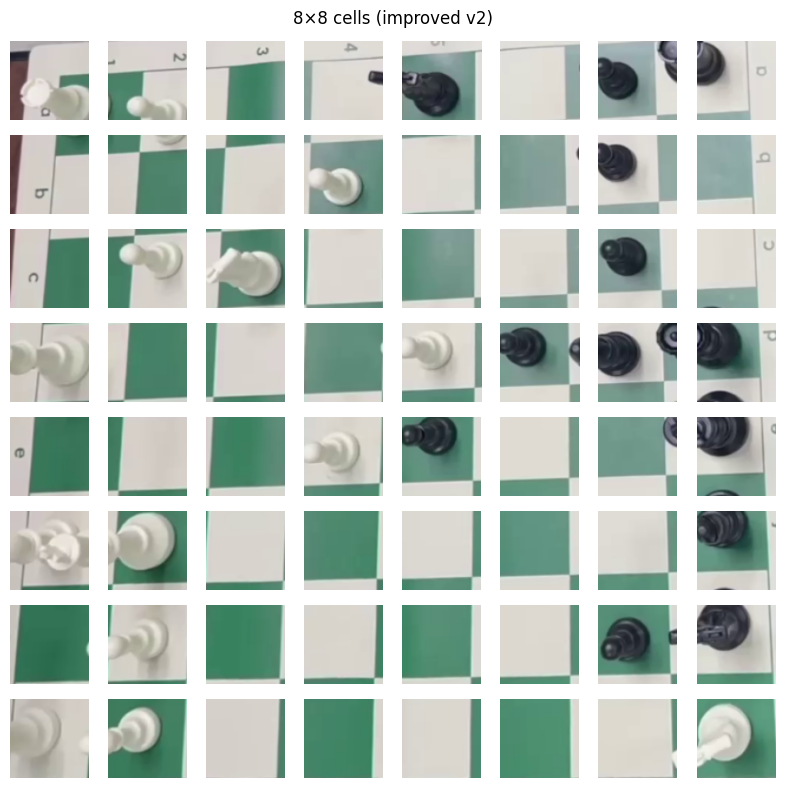

In [5]:
# ===== Cell ใหม่: ใช้ debug version =====
from Chess_Detection_Competition.improved_board import split_grid_v2_debug

cell_px = int(cfg["cells"]["img_size"])
cells, xs, ys = split_grid_v2_debug(warped, cell_px)  # ← ได้ xs, ys ด้วย

# แสดง grid overlay
import matplotlib.pyplot as plt
from PIL import Image
grid_img = Image.open("debug/grid_overlay.jpg")
plt.figure(figsize=(8, 8))
plt.imshow(grid_img)
plt.title("Grid Lines Detection (Green=Vertical, Blue=Horizontal)")
plt.axis('off')
plt.show()

# แสดง 8x8 cells เหมือนเดิม
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
k = 0
for r in range(8):
    for c in range(8):
        _, patch = cells[k]; k += 1
        axes[r, c].imshow(cv2.cvtColor(patch, cv2.COLOR_BGR2RGB))
        axes[r, c].axis("off")
fig.suptitle("8×8 cells (improved v2)")
plt.tight_layout()
plt.show()



In [7]:
# 5) save debug images (optional)
ensure_dir("debug")
cv2.imwrite(os.path.join("debug","first_frame.jpg"), frame)
cv2.imwrite(os.path.join("debug","warped.jpg"), warped)
print("Saved to debug/first_frame.jpg and debug/warped.jpg")


Saved to debug/first_frame.jpg and debug/warped.jpg
